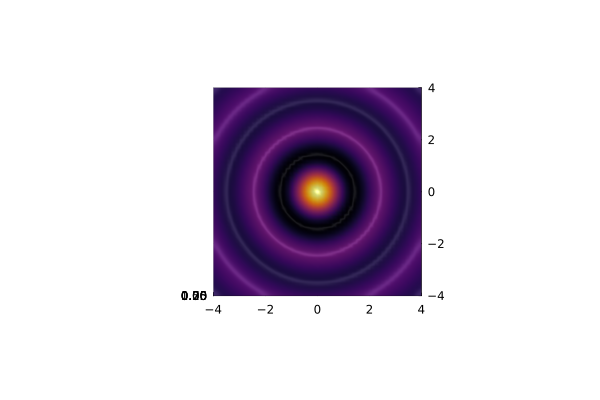

In [2]:
import LinearAlgebra # needed for the NORM function
import Plots
# example plot

# first we declare the coordinates of the inputs
x = y = range(-4, stop = 4, length = 51) # there are 51 points in the interval [-4,4]

p = Plots.surface(     # the type of plot
    x, y,              # the x and y data points
    (x, y) -> sinc(LinearAlgebra.norm([x, y])),  # the function that is to be plotted.
    colorbar=false,    # various attributes to the plot
    camera=[0, 90]
)

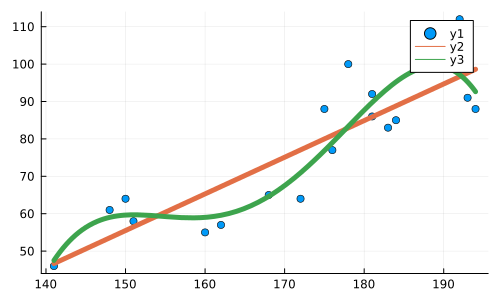

In [26]:
import CSV, DataFrames

# reading in the data.
train_data = Matrix(   # this is the enforcement of the type
    CSV.read("data/hw_data.csv", DataFrames.DataFrame,
        header = false         # one can use additional attributes for the reading function
    )
)

x_height = train_data[:,1];
y_weight = train_data[:,2];

# validating the reading operation
p = Plots.scatter(x_height,y_weight,size=[500,300],markersize=4)

linear(height,a) = a[2]*height + a[1]
p = Plots.plot!(p,
    h -> linear(h,[-91.5,.98]),
    width=5
)

k = 5

A = hcat([x_height.^j for j=0:k-1]...)
#A = hcat([ones(len(x_height)), ])
b = y_weight

#print([2^i for i=0:k-1])

#print(A)
#print(LinearAlgebra.dot(A\b, [2^i for i=0:k-1]))

# a[1] + a[2]*height+a[3]*height^2+a[4]*height^3+a[5]*height^4 #
linear(height,a) = LinearAlgebra.dot([height^i for i=0:k-1], a)
p = Plots.plot!(p,
    h -> linear(h, A\b),
    width=5
)